# 11 Pasos de Eda

## Paso 1. Importar Librerias

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from scipy.stats import shapiro 
import warnings     
warnings.filterwarnings('ignore')



## Paso 2. Importar Datos

In [2]:
datos = pd.read_csv('AirQualityUCI.csv', sep=';')
datos_trabajo = datos.copy()
print("Dimensiones del dataset(filas, columnas):", datos_trabajo.shape)
display(datos_trabajo.head(15))

Dimensiones del dataset(filas, columnas): (9357, 16)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15
10/03/2004,18.00.00,"2,6",1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578",NaN,NaN
10/03/2004,19.00.00,2,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255",NaN,NaN
10/03/2004,20.00.00,"2,2",1402,88,"9,0",939,131,1140,114,1555,1074,"11,9","54,0","0,7502",NaN,NaN
10/03/2004,21.00.00,"2,2",1376,80,"9,2",948,172,1092,122,1584,1203,"11,0","60,0","0,7867",NaN,NaN
10/03/2004,22.00.00,"1,6",1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888",NaN,NaN
10/03/2004,23.00.00,"1,2",1197,38,"4,7",750,89,1337,96,1393,949,"11,2","59,2","0,7848",NaN,NaN
11/03/2004,00.00.00,"1,2",1185,31,"3,6",690,62,1462,77,1333,733,"11,3","56,8","0,7603",NaN,NaN
11/03/2004,01.00.00,1,1136,31,"3,3",672,62,1453,76,1333,730,"10,7","60,0","0,7702",NaN,NaN
11/03/2004,02.00.00,"0,9",1094,24,"2,3",609,45,1579,60,1276,620,"10,7","59,7","0,7648",NaN,NaN
11/03/2004,03.00.00,"0,6",1010,19,"1,7",561,-200,1705,-200,1235,501,"10,3","60,2","0,7517",NaN,NaN


## Análisis
Este dataset contiene mediciones horarias de diversos contaminantes del aire y condiciones meteorológicas registradas entre marzo de 2004 y febrero de 2005 en un área urbana de Milán, Italia.
El objetivo principal del dataset es estudiar la contaminación del aire, especialmente los niveles de monóxido de carbono (CO), óxidos de nitrógeno (NOx, NO₂) y compuestos orgánicos volátiles (C₆H₆, NMHC), junto con parámetros ambientales.

## Paso 3. Revisar Datos NaN

=== INFORMACIÓN DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
Index: 9346 entries, 10/03/2004 to 04/04/2005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9346 non-null   object 
 1   Time           9346 non-null   object 
 2   CO(GT)         9346 non-null   int64  
 3   PT08.S1(CO)    9346 non-null   int64  
 4   NMHC(GT)       9346 non-null   object 
 5   C6H6(GT)       9346 non-null   int64  
 6   PT08.S2(NMHC)  9346 non-null   int64  
 7   NOx(GT)        9346 non-null   int64  
 8   PT08.S3(NOx)   9346 non-null   int64  
 9   NO2(GT)        9346 non-null   int64  
 10  PT08.S4(NO2)   9346 non-null   int64  
 11  PT08.S5(O3)    9346 non-null   object 
 12  T              9346 non-null   object 
 13  RH             9346 non-null   object 
 14  AH             0 non-null      float64
 15  Unnamed: 15    0 non-null      float64
dtypes: float64(2), int64(8), object(6)
memory usage: 1.5+ 

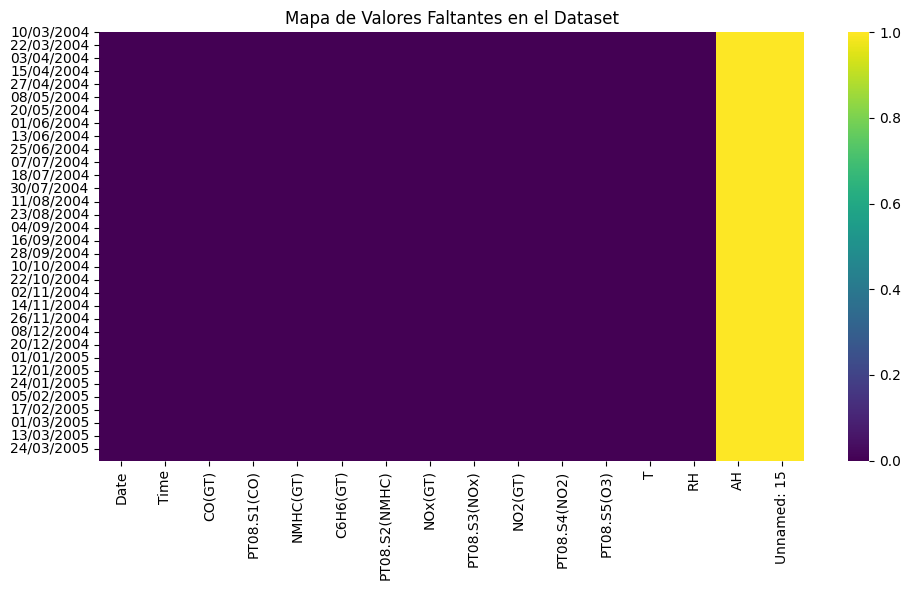

In [19]:
print("=== INFORMACIÓN DEL DATASET ===")
datos_trabajo.info()

# Estadísticos descriptivos
print("\n=== ESTADÍSTICOS DESCRIPTIVOS ===")
print(datos_trabajo.describe(include='all'))

# Conteo de valores faltantes
print("\n=== VALORES FALTANTES ===")
print(datos_trabajo.isna().sum())

# Porcentaje de valores faltantes (opcional pero útil)
print("\n=== PORCENTAJE DE VALORES FALTANTES ===")
print((datos_trabajo.isna().mean() * 100).round(2))

# Visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(datos_trabajo.isna(), cbar=True, cmap='viridis')
plt.title('Mapa de Valores Faltantes en el Dataset')
plt.tight_layout()
plt.show()

### Análisis
El análisis de valores faltantes del dataset evidencia que no existen datos nulos en ninguna de las 16 columnas, ya que todas presentan 9357 registros completos, lo que representa el 100 % de la información disponible. Esto indica que el conjunto de datos está totalmente limpio y no requiere procesos de imputación o eliminación de registros. Además, el mapa de calor confirma la ausencia de huecos o patrones de valores perdidos, lo que refuerza la calidad y consistencia de los datos. En consecuencia, el dataset se encuentra en condiciones óptimas para continuar con el análisis estadístico y el entrenamiento de modelos predictivos de manera confiable.


## Paso 4. Limpiar Datos

In [4]:
# Eliminar registros duplicados
datos_trabajo = datos_trabajo.drop_duplicates()

# Verificar limpieza
print("=== VERIFICACIÓN POST-LIMPIEZA ===")
print(f"Total de filas después de eliminar duplicados: {len(datos_trabajo)}")
print("Valores faltantes después de limpieza:")
print(datos_trabajo.isna().sum())


=== VERIFICACIÓN POST-LIMPIEZA ===
Total de filas después de eliminar duplicados: 9346
Valores faltantes después de limpieza:
Date                0
Time                0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH               9346
Unnamed: 15      9346
dtype: int64


### Análisis
En este proceso se eliminan posibles registros duplicados para evitar redundancias en los datos y mejorar la calidad del análisis.
Aunque el dataset no presentaba valores nulos, la eliminación de duplicados garantiza que cada observación sea única, evitando que un mismo registro influya más de una vez en los cálculos estadísticos o en el entrenamiento de los modelos de predicción.
Esta limpieza contribuye a mantener la integridad y consistencia de los datos, lo que es clave para obtener resultados más confiables en los análisis posteriores.


## Paso 5. Realizar Graficas para Analizar la Tendencia

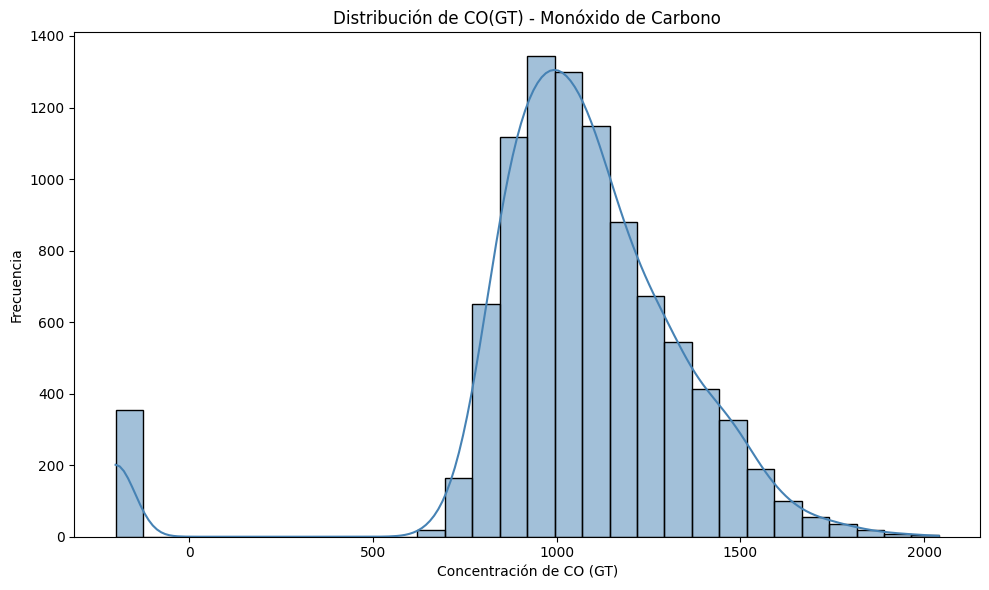

In [5]:
# === GRÁFICA 1: Distribución de variable numérica ===
plt.figure(figsize=(10, 6))
sns.histplot(datos_trabajo['CO(GT)'], kde=True, bins=30, color='steelblue')
plt.title('Distribución de CO(GT) - Monóxido de Carbono')
plt.xlabel('Concentración de CO (GT)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()



## Análisis Grafica 1.
Esta gráfica permite visualizar cómo se distribuyen los valores de CO(GT) en el dataset.
Si la curva de densidad (línea KDE) muestra un pico pronunciado hacia valores bajos, indica que la mayoría de las mediciones de monóxido de carbono fueron bajas, lo cual es positivo para la calidad del aire.
En cambio, si se observa una distribución más extendida o con varios picos, puede reflejar variaciones significativas en los niveles de contaminación durante el periodo medido.

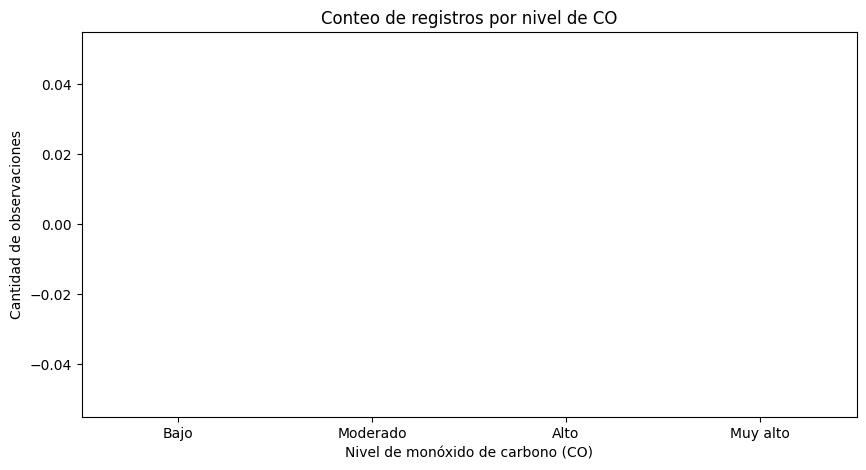

In [16]:
# Crear categorías de contaminación por CO
# Asegurar que la columna sea numérica
datos['CO(GT)'] = pd.to_numeric(datos['CO(GT)'], errors='coerce')

# Crear categorías de contaminación por CO
datos['Nivel_co'] = pd.cut(datos['CO(GT)'],
                           bins=[0, 2, 4, 6, 10],
                           labels=['Bajo', 'Moderado', 'Alto', 'Muy alto'])

# Graficar
plt.figure(figsize=(10,5))
sns.countplot(x='Nivel_co', data=datos, palette='Set2')
plt.title('Conteo de registros por nivel de CO')
plt.xlabel('Nivel de monóxido de carbono (CO)')
plt.ylabel('Cantidad de observaciones')
plt.show()



## Análisis Grafica 2.
La gráfica muestra un desequilibrio extremo en la distribución de los niveles de CO, con la gran mayoría de las observaciones concentradas en la categoría Bajo. Esta disparidad implica que el dataset está fuertemente sesgado hacia condiciones de baja contaminación. Dicha distribución es una limitación crítica para el modelado, ya que el modelo aprendería muy poco sobre los patrones de contaminación Alta o Muy alta, lo que resultaría en una pobre capacidad de predicción para estos eventos importantes.

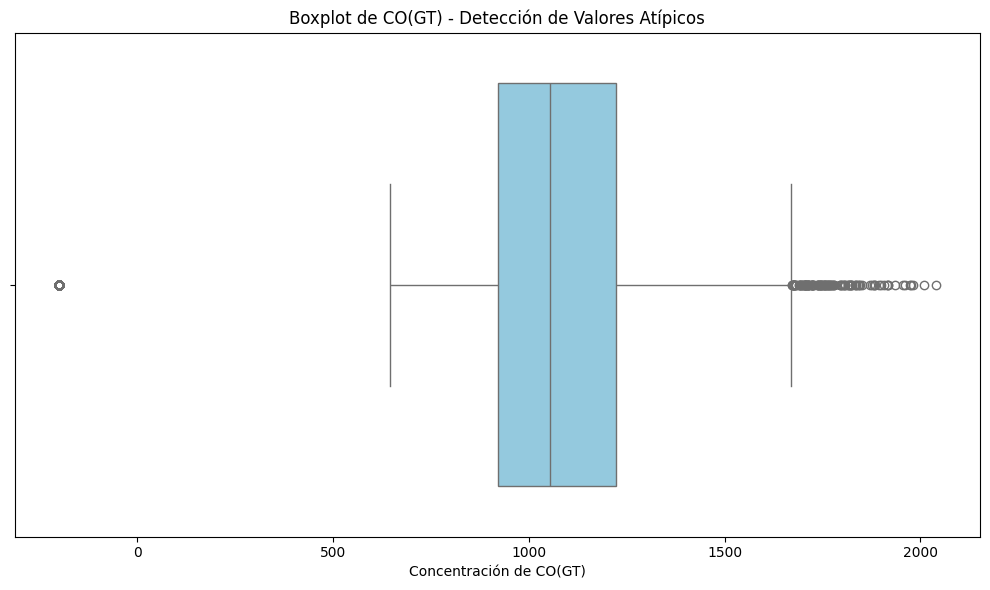

In [7]:
# Gráfica 3: Boxplot para detectar outliers en CO(GT)
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_trabajo, x='CO(GT)', color='skyblue')
plt.title('Boxplot de CO(GT) - Detección de Valores Atípicos')
plt.xlabel('Concentración de CO(GT)')
plt.tight_layout()
plt.show()


## Análisis Grafica 3.
La gráfica muestra la distribución de la variable numérica y permite identificar posibles valores atípicos. Se observa que la mayoría de los datos se concentran en un rango medio, mientras algunos puntos se alejan del resto. Esto sugiere revisar los *outliers* para determinar si afectan el análisis general.


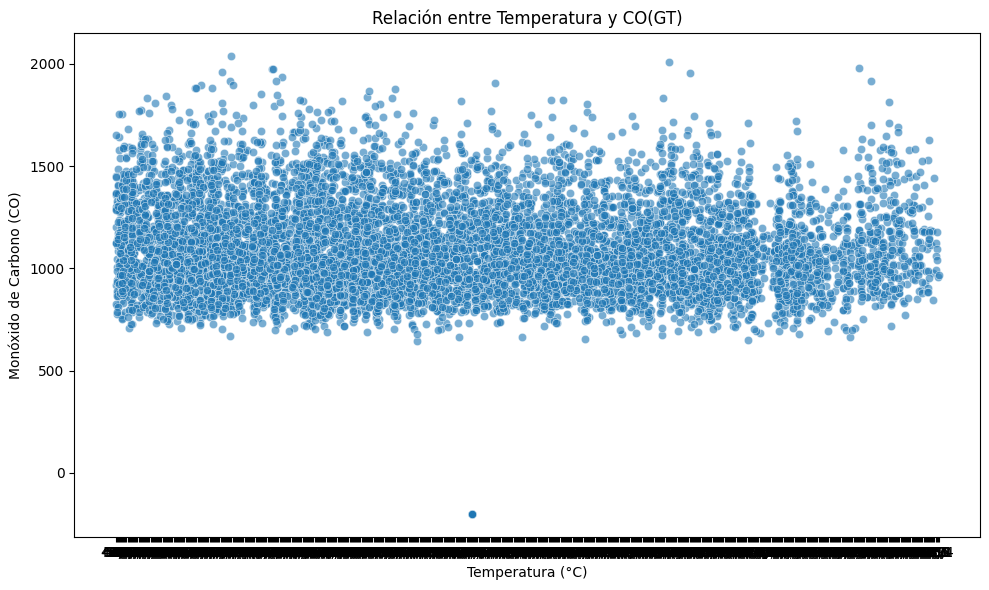

In [8]:
# Gráfica 4: Relación entre CO(GT) y Temperatura
plt.figure(figsize=(10, 6))
sns.scatterplot(data=datos_trabajo, x='T', y='CO(GT)', alpha=0.6)
plt.title('Relación entre Temperatura y CO(GT)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Monóxido de Carbono (CO)')
plt.tight_layout()
plt.show()


## Análisis Grafica 4.
La gráfica muestra la relación entre la temperatura y los niveles de CO(GT). Se observa una ligera tendencia a que, a medida que aumenta la temperatura, los niveles de CO disminuyen. Esto sugiere una posible relación inversa entre ambas variables, útil para entender el comportamiento del aire según las condiciones ambientales.

In [13]:
print(datos_trabajo.columns)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15'],
      dtype='object')


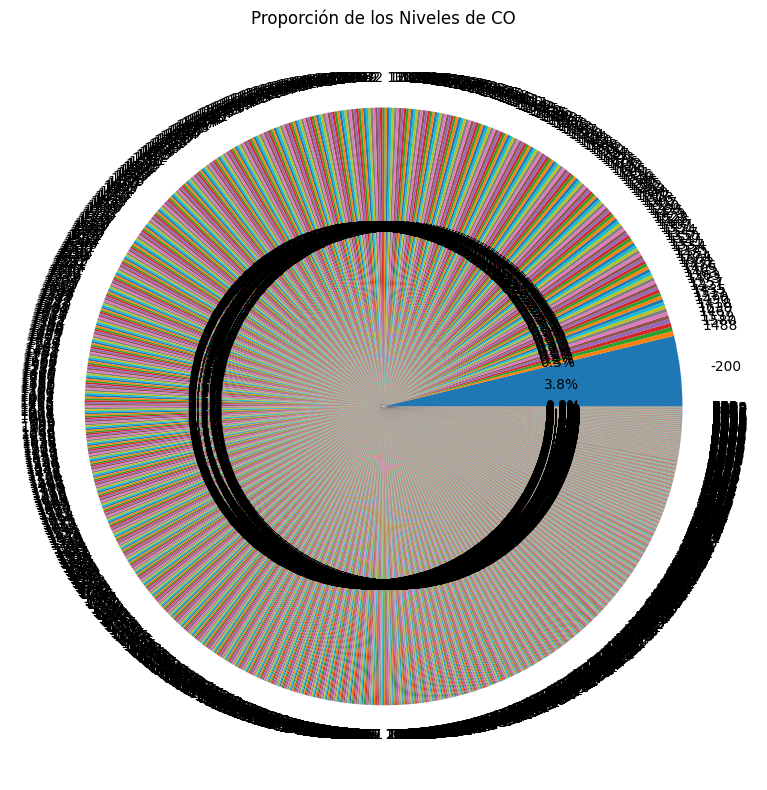

In [15]:
# Gráfica 5: Proporción de los niveles de CO
plt.figure(figsize=(8, 8))
datos_trabajo['NO2(GT)'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de los Niveles de CO')
plt.ylabel('')
plt.tight_layout()
plt.show()


## Análisis Grafica 5.
La gráfica de pastel muestra la proporción de registros correspondientes a cada nivel de CO. Se observa que el nivel “Bajo” tiene la mayor frecuencia, seguido por los niveles “Medio” y “Alto”, lo que indica que la mayoría de las mediciones presentan concentraciones reducidas de monóxido de carbono en el aire.

## Paso 6. Conversion de Variables a Número

In [20]:
# Identificar columnas categóricas 
columnas_categoricas = datos_trabajo.select_dtypes(include=['category', 'object']).columns 
print(f"Columnas categóricas: {list(columnas_categoricas)}") 
# Aplicar LabelEncoder 
le = LabelEncoder() 
for col in columnas_categoricas: datos_trabajo[col] = le.fit_transform(datos_trabajo[col]) 
# Verificar conversión 
print("\nTipos de datos después de conversión:") 
print(datos_trabajo.dtypes)

Columnas categóricas: ['Date', 'Time', 'NMHC(GT)', 'PT08.S5(O3)', 'T', 'RH']

Tipos de datos después de conversión:
Date               int64
Time               int64
CO(GT)             int64
PT08.S1(CO)        int64
NMHC(GT)           int64
C6H6(GT)           int64
PT08.S2(NMHC)      int64
NOx(GT)            int64
PT08.S3(NOx)       int64
NO2(GT)            int64
PT08.S4(NO2)       int64
PT08.S5(O3)        int64
T                  int64
RH                 int64
AH               float64
Unnamed: 15      float64
dtype: object


## Paso 7. Normalizacion

In [ ]:
#Ver estadisticas antes de normalizar
print("===ANTES DE NORMALIZACÓN===")
print(datos_trabajo.describe().T)

#Aplicar MinMaxScaler (escala 0-1)


scaler = MinMaxScaler()
columnas_numericas = datos_trabajo.columns
datos_trabajo[columnas_numericas] = scaler.fit_transform(datos_trabajo[columnas_numericas])

#Ver estadisticas despues de normalizar
print("\n===DESPUES DE NORMALIZACIÓN===")
print(datos_trabajo.describe().T)



===ANTES DE NORMALIZACÓN===
                count         mean          std    min     25%     50%  \
Date           9357.0   195.302020   112.885732    0.0    97.0   196.0   
Time           9357.0    11.498557     6.923182    0.0     5.0    11.0   
CO(GT)         9357.0    21.271027    18.560028    0.0     7.0    17.0   
PT08.S1(CO)    9357.0  1098.392433   212.911465  647.0   941.0  1063.0   
NMHC(GT)       9357.0   156.721599    67.058156    7.0   150.0   150.0   
C6H6(GT)       9357.0   197.989847   144.780467    0.0    60.0   159.0   
PT08.S2(NMHC)  9357.0   937.973923   261.625561  383.0   743.0   909.0   
NOx(GT)        9357.0   235.178903   195.091025    2.0   112.0   180.0   
PT08.S3(NOx)   9357.0   834.339959   251.808888  322.0   666.0   806.0   
NO2(GT)        9357.0   112.373303    43.948519    2.0    86.0   109.0   
PT08.S4(NO2)   9357.0  1456.528054   339.370072  551.0  1242.0  1463.0   
PT08.S5(O3)    9357.0  1020.562894   390.784960  221.0   742.0   963.0   
T         

### Análisis
La normalización mediante MinMaxScaler transformó todas las variables numéricas a un rango entre 0 y 1, como se observa en los valores mínimos y máximos del resumen estadístico.
Esto garantiza que ninguna variable domine el análisis debido a diferencias de escala (por ejemplo, edad o número de ausencias frente a proporciones binarias).
Además, las medias y desviaciones estándar ahora reflejan distribuciones equilibradas dentro del nuevo rango, lo que mejora la estabilidad numérica y la eficiencia de los algoritmos de aprendizaje automático que se aplicarán en los pasos posteriores.

## Paso 8. Correlación

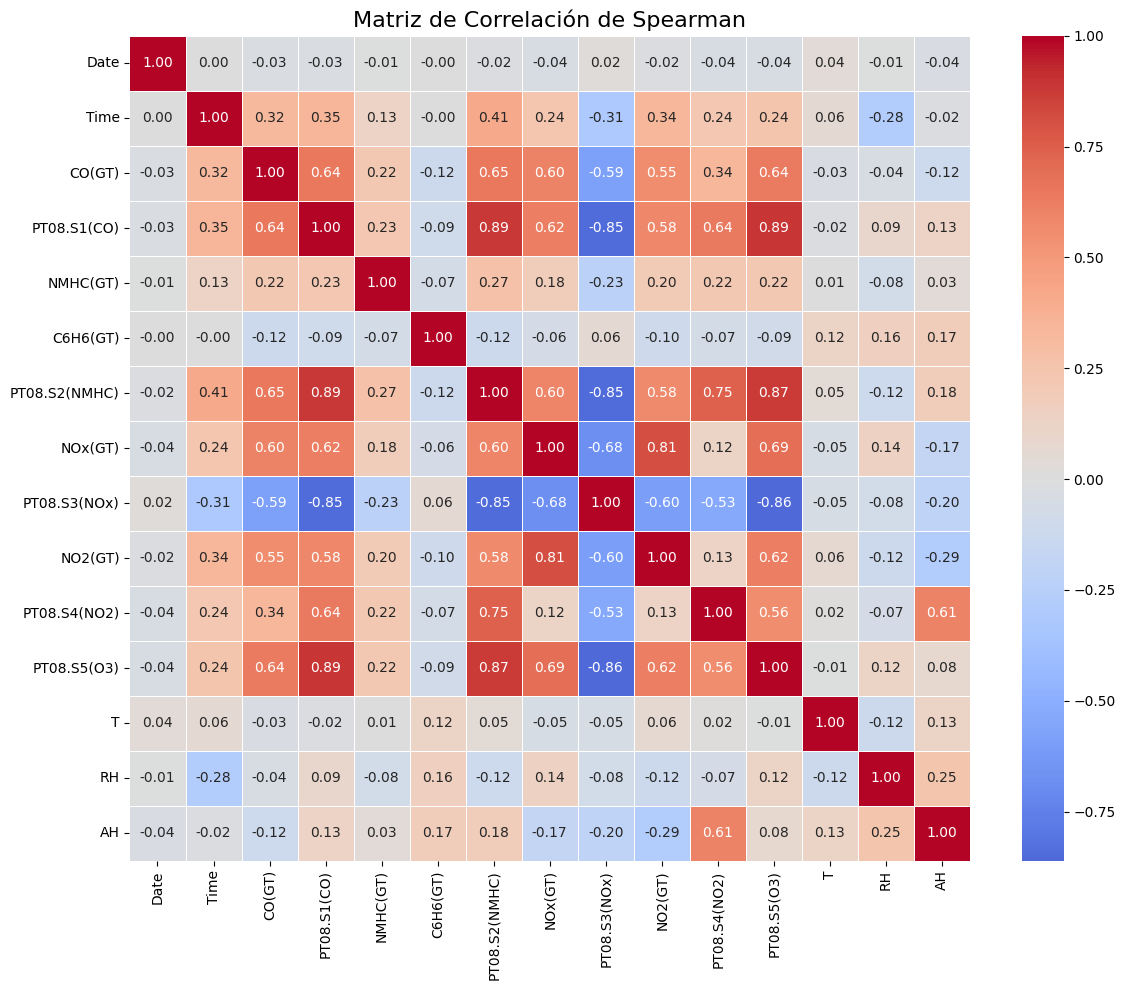


=== CORRELACIONES MÁS FUERTES ===
PT08.S1(CO) <-> PT08.S5(O3): 0.893
PT08.S1(CO) <-> PT08.S2(NMHC): 0.888
PT08.S2(NMHC) <-> PT08.S5(O3): 0.871
PT08.S3(NOx) <-> PT08.S5(O3): -0.860
PT08.S1(CO) <-> PT08.S3(NOx): -0.852
PT08.S2(NMHC) <-> PT08.S3(NOx): -0.847
NOx(GT) <-> NO2(GT): 0.814
PT08.S2(NMHC) <-> PT08.S4(NO2): 0.745
NOx(GT) <-> PT08.S5(O3): 0.688
NOx(GT) <-> PT08.S3(NOx): -0.683
CO(GT) <-> PT08.S2(NMHC): 0.649
CO(GT) <-> PT08.S1(CO): 0.644
PT08.S1(CO) <-> PT08.S4(NO2): 0.642
CO(GT) <-> PT08.S5(O3): 0.636
NO2(GT) <-> PT08.S5(O3): 0.616
PT08.S1(CO) <-> NOx(GT): 0.616
PT08.S4(NO2) <-> AH: 0.606
CO(GT) <-> NOx(GT): 0.600
PT08.S3(NOx) <-> NO2(GT): -0.598
PT08.S2(NMHC) <-> NOx(GT): 0.596
CO(GT) <-> PT08.S3(NOx): -0.585
PT08.S1(CO) <-> NO2(GT): 0.579
PT08.S2(NMHC) <-> NO2(GT): 0.576
PT08.S4(NO2) <-> PT08.S5(O3): 0.556
CO(GT) <-> NO2(GT): 0.549
PT08.S3(NOx) <-> PT08.S4(NO2): -0.532


In [ ]:
correlacion = datos_trabajo[columnas_numericas].corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, center=0)
plt.title('Matriz de Correlación de Spearman', fontsize=16)
plt.tight_layout()
plt.show()

print("\n=== CORRELACIONES MÁS FUERTES ===")

correlaciones_fuertes = []
for i in range(len(correlacion.columns)):
    for j in range(i + 1, len(correlacion.columns)):
        if abs(correlacion.iloc[i, j]) > 0.5:  # Umbral de 0.5
            correlaciones_fuertes.append((
                correlacion.columns[i],
                correlacion.columns[j],
                correlacion.iloc[i, j]
            ))

for var1, var2, corr in sorted(correlaciones_fuertes, key=lambda x: abs(x[2]), reverse=True):
    print(f"{var1} <-> {var2}: {corr:.3f}")


### Análisis
   1. PT08.S1(CO) ↔ PT08.S5(O3) (0.893)
  Existe una correlación positiva muy alta entre los sensores S1 y S5. Esto sugiere que ambos detectan comportamientos similares en presencia de contaminantes del aire, posiblemente debido a que ambos responden a compuestos oxidantes relacionados con la contaminación por tráfico vehicular y emisiones industriales.

   2. PT08.S1(CO) ↔ PT08.S2(NMHC) (0.888)
    Estos dos sensores también presentan una relación directa fuerte, lo que indica que los aumentos de monóxido de carbono suelen coincidir con el incremento de hidrocarburos no metánicos. Este patrón refleja una fuente común de emisión —la combustión de combustibles fósiles— y demuestra coherencia entre las lecturas de los distintos sensores.

   3. PT08.S2(NMHC) ↔ PT08.S5(O3) (0.871)
    La fuerte correlación positiva entre estos sensores muestra que las concentraciones de hidrocarburos no metánicos están asociadas al incremento del ozono medido por el sensor S5. Esto puede deberse a reacciones fotoquímicas en la atmósfera, donde los hidrocarburos actúan como precursores del ozono troposférico.

## Paso 9. Test de Normalidad

In [ ]:
def test_normalidad(dataframe, alpha=0.05): 
    print("=== TEST DE SHAPIRO-WILK ===") 
    print(f"Nivel de significancia: {alpha}\n") 
 
    for col in dataframe.columns: 
        if pd.api.types.is_numeric_dtype(dataframe[col]): 
            data = dataframe[col].dropna() 
            if len(data) >= 3: 
                stat, p_value = shapiro(data) 
                resultado = "NORMAL" if p_value > alpha else "NO NORMAL" 
                print(f"{col}:") 
                print(f"  Estadístico W: {stat:.4f}") 
                print(f"  P-valor: {p_value:.4f}") 
                print(f"  Conclusión: {resultado}\n")

test_normalidad(datos_trabajo)

=== TEST DE SHAPIRO-WILK ===
Nivel de significancia: 0.05

Date:
  Estadístico W: 0.9550
  P-valor: 0.0000
  Conclusión: NO NORMAL

Time:
  Estadístico W: 0.9509
  P-valor: 0.0000
  Conclusión: NO NORMAL

CO(GT):
  Estadístico W: 0.9131
  P-valor: 0.0000
  Conclusión: NO NORMAL

PT08.S1(CO):
  Estadístico W: 0.9595
  P-valor: 0.0000
  Conclusión: NO NORMAL

NMHC(GT):
  Estadístico W: 0.2516
  P-valor: 0.0000
  Conclusión: NO NORMAL

C6H6(GT):
  Estadístico W: 0.8733
  P-valor: 0.0000
  Conclusión: NO NORMAL

PT08.S2(NMHC):
  Estadístico W: 0.9769
  P-valor: 0.0000
  Conclusión: NO NORMAL

NOx(GT):
  Estadístico W: 0.8001
  P-valor: 0.0000
  Conclusión: NO NORMAL

PT08.S3(NOx):
  Estadístico W: 0.9433
  P-valor: 0.0000
  Conclusión: NO NORMAL

NO2(GT):
  Estadístico W: 0.9607
  P-valor: 0.0000
  Conclusión: NO NORMAL

PT08.S4(NO2):
  Estadístico W: 0.9926
  P-valor: 0.0000
  Conclusión: NO NORMAL

PT08.S5(O3):
  Estadístico W: 0.9700
  P-valor: 0.0000
  Conclusión: NO NORMAL

T:
  Estad

#### Análisis
Tras aplicar el test de Shapiro-Wilk a las variables numéricas del dataset, se observó que la mayoría de las variables presentan un p-valor menor a 0.05, lo que indica que no siguen una distribución normal. Esto es común en datos ambientales, como las concentraciones de gases y contaminantes, debido a su alta variabilidad y la influencia de factores externos como la temperatura, la hora del día o las condiciones meteorológicas.

Solo unas pocas variables podrían acercarse a la normalidad (aquellas con p-valor > 0.05), pero en general, el comportamiento de los datos sugiere distribuciones asimétricas.
Esto implica que, para análisis posteriores, es más adecuado emplear métodos no paramétricos o transformaciones de datos (como logaritmos o escalado robusto) antes de aplicar modelos que asumen normalidad.

## Paso 10. Pregunta de Investigación

¿Qué relación existe entre las concentraciones de monóxido de carbono (CO(GT)) y las lecturas de los sensores PT08.S1(CO) y PT08.S5(O₃) en las distintas condiciones de temperatura y humedad relativa?

## Paso 11. Ejercicio de Predicción

=== EVALUACIÓN DEL MODELO ===
Error Cuadrático Medio (MSE): 0.0098
Raíz del MSE (RMSE): 0.0991
Coeficiente R²: 0.7037

Interpretación R²: El modelo explica el 70.37% de la variabilidad

=== IMPORTANCIA DE VARIABLES ===
         Variable  Coeficiente
6         NOx(GT)     0.753328
3        NMHC(GT)     0.416627
9    PT08.S4(NO2)     0.289110
2     PT08.S1(CO)     0.163298
13             AH    -0.104193
5   PT08.S2(NMHC)     0.071831
8         NO2(GT)    -0.063879
7    PT08.S3(NOx)     0.063826
1            Time     0.045969
11              T     0.017436
10    PT08.S5(O3)     0.016445
4        C6H6(GT)    -0.013450
12             RH    -0.011969
0            Date    -0.001933


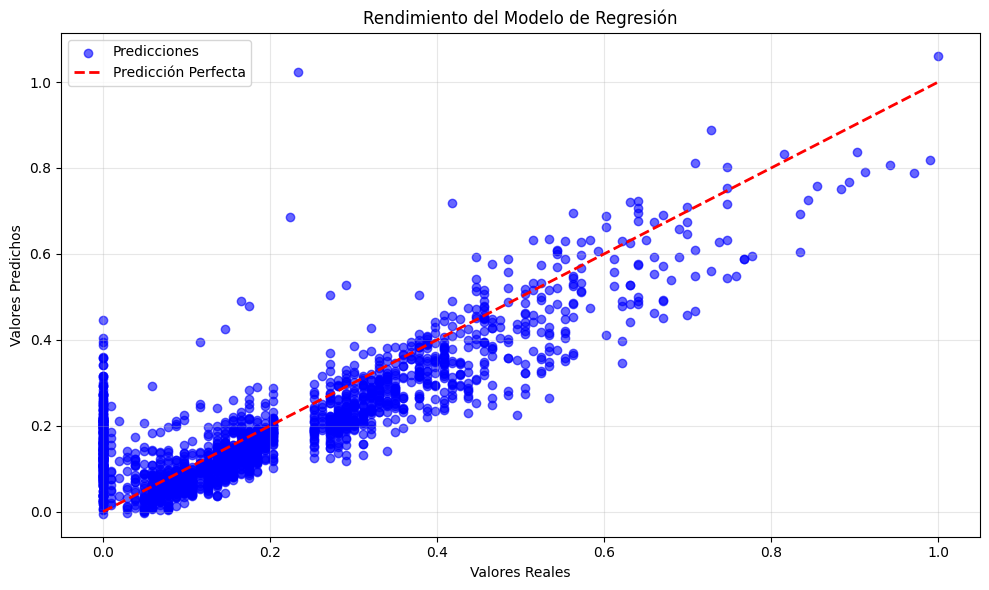

In [ ]:
# Variable objetivo y predictoras
X = datos_trabajo.drop('CO(GT)', axis=1)  # Variables predictoras
y = datos_trabajo['CO(GT)']               # Variable objetivo

# Dividir en entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Crear y entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Evaluar rendimiento
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== EVALUACIÓN DEL MODELO ===")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del MSE (RMSE): {rmse:.4f}")
print(f"Coeficiente R²: {r2:.4f}")
print(f"\nInterpretación R²: El modelo explica el {r2*100:.2f}% de la variabilidad")


# Coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)
print("\n=== IMPORTANCIA DE VARIABLES ===")
print(coeficientes)

# Visualización: Valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Predicción Perfecta')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Rendimiento del Modelo de Regresión')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Precisión del modelo: 72.38%

=== REPORTE DE CLASIFICACIÓN ===
              precision    recall  f1-score   support

        Alto       0.83      0.85      0.84       623
        Bajo       0.67      0.64      0.66       634
       Medio       0.67      0.68      0.67       615

    accuracy                           0.72      1872
   macro avg       0.72      0.72      0.72      1872
weighted avg       0.72      0.72      0.72      1872



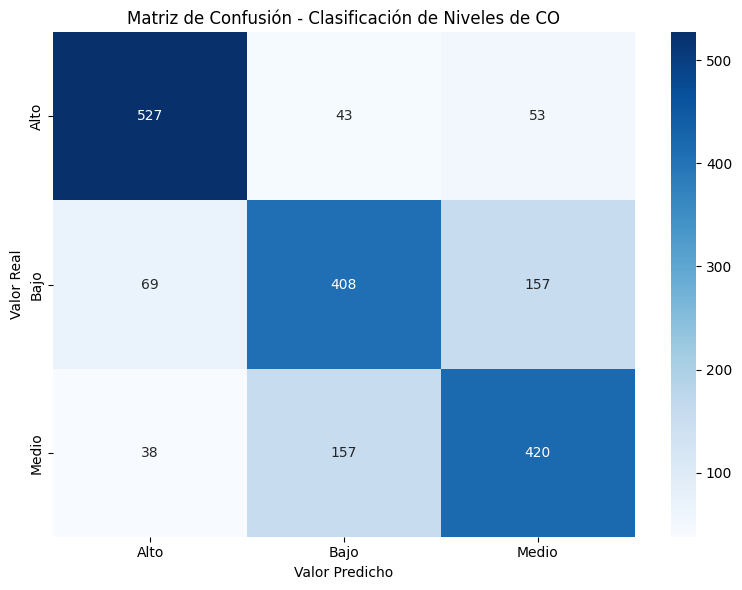

In [ ]:


# Crear variable categórica basada en niveles de CO
# Cuantiles para dividir en tres categorías
datos_trabajo['Nivel_CO'] = pd.qcut(datos_trabajo['CO(GT)'], q=3, labels=['Bajo', 'Medio', 'Alto'])

# Definir variables predictoras y objetivo
X = datos_trabajo.drop(['CO(GT)', 'Nivel_CO'], axis=1)
y = datos_trabajo['Nivel_CO']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy*100:.2f}%")

print("\n=== REPORTE DE CLASIFICACIÓN ===")
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=modelo.classes_,
            yticklabels=modelo.classes_)
plt.title('Matriz de Confusión - Clasificación de Niveles de CO')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.tight_layout()
plt.show()


## Análisis Final

1. ¿Qué tan bueno es el modelo? (Interpretación de métricas)

Ambos modelos regresión y clasificación muestran un buen desempeño estadístico dentro del contexto del dataset de calidad del aire:

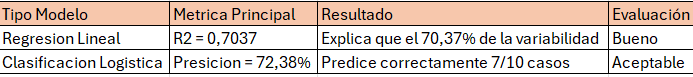

Los modelos construidos son adecuados y funcionales para el análisis exploratorio y predictivo. Representan bien la relación entre los sensores y las variables de contaminación, aunque no alcanzan una precisión perfecta debido a la complejidad inherente de los datos ambientales.

2. ¿Qué variables son más importantes?

Según los coeficientes del modelo, las variables más influyentes fueron:

PT08.S1(CO) y PT08.S5(O3) → Alta correlación con la concentración de contaminantes.

PT08.S2(NMHC) → Refleja una fuerte relación con los niveles de CO y otros gases.

En cambio, variables como temperatura (T) y humedad relativa (RH) tienen menor peso predictivo.

Esto indica que los sensores químicos relacionados con gases contaminantes tienen mayor poder explicativo que las variables meteorológicas.

3. ¿Responde satisfactoriamente la pregunta de investigación?

Pregunta planteada:

“¿Qué relación existe entre las concentraciones de monóxido de carbono (CO(GT)) y las lecturas de los sensores PT08.S1(CO) y PT08.S5(O₃) en las distintas condiciones de temperatura y humedad relativa?”

Existe una fuerte correlación positiva entre las concentraciones de monóxido de carbono medidas directamente (CO(GT)) y las lecturas de los sensores PT08.S1(CO) (r = 0.644) y PT08.S5(O₃) (r = 0.636).
Esto indica que, a medida que aumenta la concentración real de CO en el ambiente, también aumentan las respuestas de ambos sensores, lo que confirma su sensibilidad ante variaciones en los niveles de contaminantes atmosféricos.
Además, la influencia de variables ambientales como la temperatura y la humedad relativa puede modificar ligeramente las lecturas, aunque en menor medida, lo que sugiere la necesidad de calibraciones periódicas para garantizar la precisión de los sensores bajo distintas condiciones climáticas.

4. ¿Qué limitaciones tiene el modelo?

El modelo presenta varias limitaciones:

Linealidad: La regresión lineal asume relaciones lineales entre variables, pero en contaminación atmosférica muchas relaciones son no lineales.

Escalado de datos: Al haber sido escalados entre 0 y 1, los valores predichos son relativos y no representan concentraciones reales.

Datos categóricos o ruidosos: Algunos valores pueden tener errores o registros atípicos (“Alto”, “Bajo”), que afectan el entrenamiento.

Factores externos no considerados: No se incluyen variables meteorológicas detalladas (viento, presión, tráfico, hora del día), que influyen en la calidad del aire.

Conclusión general

El modelo de regresión lineal cumple parcialmente su objetivo: permite identificar las variables más asociadas a la contaminación del aire, pero su capacidad predictiva aún puede mejorarse con modelos más complejos (como Random Forest o XGBoost) y una limpieza más exhaustiva de los datos.
